In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Load data in a dataframe:
df = pd.read_csv("winequality-red.csv")
y = df['quality']
df.drop('quality', axis='columns', inplace=True)


#df.drop('pH', axis='columns', inplace=True)

# Linear Regression


In [2]:
dfl=pd.read_csv("winequality-red.csv")
dfl.drop('quality',axis='columns', inplace=True) #for convinience
dfl['constant'] = [1]*1599 #for linear reg
Xtrain,Xtest,ytrain,ytest = train_test_split(dfl,y,random_state =0)
res = sm.OLS(ytrain,Xtrain).fit()
print(res.summary())
#Remove variables according to P-values
dfl.drop('free sulfur dioxide', axis='columns', inplace=True)
dfl.drop('density', axis='columns', inplace=True)
dfl.drop('fixed acidity', axis='columns', inplace=True)
dfl.drop('citric acid', axis='columns', inplace=True)
dfl.drop('residual sugar', axis='columns', inplace=True)


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     61.56
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          2.84e-108
Time:                        20:46:42   Log-Likelihood:                -1186.3
No. Observations:                1199   AIC:                             2397.
Df Residuals:                    1187   BIC:                             2458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0227 

### Train-Test Split for linear

In [3]:
Xtrain,Xtest,ytrain,ytest = train_test_split(dfl,y,random_state =0)

In [4]:
reg = LinearRegression()
reg.fit(Xtrain, ytrain)
regpred=reg.predict(Xtest)
print(reg.score(Xtrain,ytrain))
print(reg.score(Xtest,ytest))

0.36081486872044355
0.3400315594249581


In [5]:
res = sm.OLS(ytrain,Xtrain).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     112.1
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          3.33e-112
Time:                        20:46:42   Log-Likelihood:                -1188.5
No. Observations:                1199   AIC:                             2391.
Df Residuals:                    1192   BIC:                             2427.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.1704 

# Classification

### Train-Test Split for Classification

In [6]:
yc = np.zeros(len(y))
for i in range(len(y)):
    yc[i] = y[i]>=7.0
Xtrain,Xtest,ytrain,ytest = train_test_split(df,yc,random_state =0)


## Random Forest

In [7]:
tree_clf = RandomForestClassifier(n_estimators=100,random_state=0)
tree_clf.fit(Xtrain,ytrain)
ypred=tree_clf.predict(Xtest)
print(tree_clf.score(Xtest, ytest))
print(metrics.classification_report(ytest,ypred))

0.93
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       355
         1.0       0.72      0.62      0.67        45

    accuracy                           0.93       400
   macro avg       0.84      0.80      0.81       400
weighted avg       0.93      0.93      0.93       400



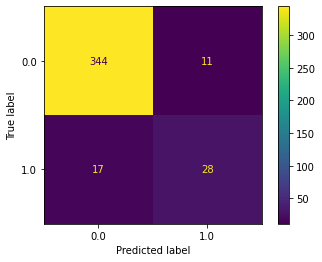

In [8]:
from sklearn import svm
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, ypred)    

In [22]:
importances = tree_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_clf.estimators_], axis=0)
for i in range(len(std)):
    print("Feature "+str((i+1))+" importance is:"+str(round(importances[i],2)) +" 95% confidence interval: ["+str(round(importances[i]-2*std[i],2))+","+str(round(importances[i]+2*std[i],2))+"]")

Feature 1 importance is:0.07452421586758223 95% confidence interval: [0.007153693525761257,0.1418947382094032]
Feature 2 importance is:0.12270838469475334 95% confidence interval: [0.023626934132932126,0.22178983525657456]
Feature 3 importance is:0.0853978162713075 95% confidence interval: [0.010321545717240935,0.16047408682537406]
Feature 4 importance is:0.06781533184145891 95% confidence interval: [0.0166955858365839,0.11893507784633392]
Feature 5 importance is:0.06879783666851792 95% confidence interval: [0.008309947511472064,0.12928572582556377]
Feature 6 importance is:0.05721522687353266 95% confidence interval: [0.01065939836335679,0.10377105538370852]
Feature 7 importance is:0.08163315680456311 95% confidence interval: [0.025173199325655142,0.13809311428347107]
Feature 8 importance is:0.09189405484156245 95% confidence interval: [0.010481158981026,0.1733069507020989]
Feature 9 importance is:0.05907658098856086 95% confidence interval: [0.0036613989334164793,0.11449176304370524]


## SVM

0.8875


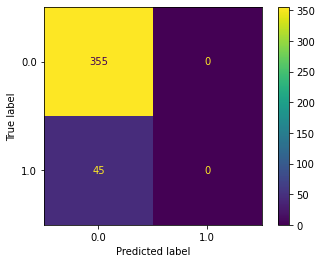

In [13]:
clf = svm.SVC(random_state=0)
clf.fit(Xtrain, ytrain)
predicted = clf.predict(Xtest)
#print(metrics.classification_report(ytest,predicted))
print(clf.score(Xtest, ytest))
disp = metrics.ConfusionMatrixDisplay.from_predictions(ytest, predicted)  